In [98]:
import pprint
import pandas
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [67]:
#load data
airports=pandas.read_csv("data/airports.csv",encoding = "latin1")
events_US=pandas.read_csv("data/events_US.csv",encoding = "latin1")
fares=pandas.read_csv("data/fares.csv",encoding = "latin1")
flight_traffic=pandas.read_csv("data/flight_traffic.csv",encoding = "latin1")
stock_prices=pandas.read_csv("data/stock_prices.csv",encoding = "latin1")
weather=pandas.read_csv("data/weather.csv",encoding = "latin1")

In [68]:
airport_names = np.unique(list(airports['airport_id']) + list(fares['origin_airport']) + list(fares['destination_airport']) + list(flight_traffic['origin_airport']) + list(flight_traffic['destination_airport']))
flight_traffic.dtypes

year                     int64
month                    int64
day                      int64
airline_id              object
origin_airport          object
destination_airport     object
scheduled_departure      int64
actual_departure       float64
taxi_out               float64
wheels_off             float64
wheels_on              float64
taxi_in                float64
scheduled_arrival        int64
actual_arrival         float64
cancelled              float64
diverted               float64
scheduled_elapsed      float64
actual_elapsed         float64
distance               float64
airline_delay          float64
weather_delay          float64
air_system_delay       float64
security_delay         float64
aircraft_delay         float64
dtype: object

In [69]:
id_to_airline = {
    "UA": "United Airlines",
    "AA": "American Airlines",
    "US": "US Airlines",
    "F9": "Frontier Airlines",
    "B6": "JetBlue Airlines",
    "OO": "Skywest Airlines",
    "AS": "Alaska Airlines",
    "NK": "Spirit Airlines",
    "WN": "Southwest Airlines",
    "DL": "Delta Airlines",
    "EV": "Atlantic Southeast Airlines",
    "HA": "Hawaiian Airlines",
    "MQ": "American Eagle Airlines",
    "VX": "Virgin America"
}

flights_by_airline = {}

print("***** Flights by airline *****")
for id in id_to_airline:
    print("{}: {}".format(id_to_airline[id], len(flight_traffic.index[flight_traffic['airline_id']==id])))
    flights_by_airline[id] = len(flight_traffic.index[flight_traffic['airline_id']==id])
    
airlines_by_airport = {}

print("\n\n***** Airlines by airport *****")
# for index, row in flight_traffic.iterrows():
#     print(row)
#     if(index>10):
#         break
# for id in id_to_airline:
#     print("{}: {}".format(id_to_airline[id], len(fares.index[fares['airline_id']==id])))
#     flights_by_airline[id] = len(fares.index[fares['airline_id']==id])


***** Flights by airline *****
United Airlines: 584481
American Airlines: 896348
US Airlines: 0
Frontier Airlines: 103027
JetBlue Airlines: 298654
Skywest Airlines: 706527
Alaska Airlines: 185068
Spirit Airlines: 156818
Southwest Airlines: 1329444
Delta Airlines: 923560
Atlantic Southeast Airlines: 339541
Hawaiian Airlines: 80172
American Eagle Airlines: 0
Virgin America: 70981


***** Airlines by airport *****


In [188]:
airport_per_airline_counts = flight_traffic.groupby(['origin_airport','airline_id']).count()['year']

In [193]:
for name, val in airport_per_airline_counts.index:
    print ("{}: {}".format(name, val))


ABE: DL
ABE: EV
ABE: OO
ABI: EV
ABQ: AA
ABQ: AS
ABQ: B6
ABQ: DL
ABQ: EV
ABQ: F9
ABQ: OO
ABQ: UA
ABQ: WN
ABR: OO
ABY: EV
ABY: OO
ACK: B6
ACT: EV
ACV: OO
ACY: NK
ADK: AS
ADQ: AS
AEX: EV
AEX: OO
AGS: DL
AGS: EV
AGS: OO
AGS: UA
AKN: AS
ALB: AA
ALB: B6
ALB: DL
ALB: EV
ALB: OO
ALB: UA
ALB: WN
ALO: OO
AMA: AA
AMA: EV
AMA: OO
AMA: WN
ANC: AA
ANC: AS
ANC: B6
ANC: DL
ANC: UA
APN: OO
ASE: OO
ATL: AA
ATL: AS
ATL: B6
ATL: DL
ATL: EV
ATL: F9
ATL: NK
ATL: OO
ATL: UA
ATL: WN
ATW: DL
ATW: EV
ATW: OO
AUS: AA
AUS: AS
AUS: B6
AUS: DL
AUS: EV
AUS: F9
AUS: OO
AUS: UA
AUS: VX
AUS: WN
AVL: DL
AVL: EV
AVL: OO
AVL: UA
AVP: DL
AVP: EV
AVP: OO
AZO: EV
AZO: OO
BDL: AA
BDL: B6
BDL: DL
BDL: EV
BDL: NK
BDL: OO
BDL: UA
BDL: WN
BET: AS
BFL: OO
BGM: OO
BGR: DL
BGR: EV
BGR: OO
BHM: DL
BHM: EV
BHM: OO
BHM: WN
BIL: DL
BIL: OO
BIL: UA
BIS: DL
BIS: EV
BIS: F9
BIS: OO
BJI: OO
BLI: AS
BLI: OO
BMI: DL
BMI: EV
BMI: OO
BNA: AA
BNA: AS
BNA: B6
BNA: DL
BNA: EV
BNA: F9
BNA: OO
BNA: UA
BNA: VX
BNA: WN
BOI: AA
BOI: AS
BOI: DL
BOI: OO


In [218]:
competition_per_airport = {}
airline_list = [
    "AA",
    "UA",
    "B6",
    "OO",
    "AS",
    "NK",
    "WN",
    "DL",
    "HA"
]

counts_per_pair = np.zeros((9,9))
counts_per_pair_in_competitive_airports = np.zeros((9,9))

for name in airport_names:
    if name not in airport_per_airline_counts:
        continue
    largest_arlines = airport_per_airline_counts[name].nlargest(2)
    
    print(largest_arlines)
    if(len(largest_arlines.index)>1):
        a1 = largest_arlines.index[0]
        a2 = largest_arlines.index[1]
        all_airlines = airport_per_airline_counts[name]
        competition_per_airport[name]=largest_arlines.agg('sum')/all_airlines.agg('sum')
        if a1 in airline_list and a2 in airline_list:
            a1_i = airline_list.index(a1)
            a2_i = airline_list.index(a2)
            counts_per_pair[a1_i][a2_i]+=1
            counts_per_pair[a2_i][a1_i]+=1
            
            if competition_per_airport[name] < .7:
                counts_per_pair_in_competitive_airports[a1_i][a2_i]+=1
                counts_per_pair_in_competitive_airports[a2_i][a1_i]+=1
 
            print(largest_arlines.index[0])
            print(largest_arlines.index[1])

#this is the domination of the top 2 airlines for every airport
pprint.pprint(competition_per_airport)

#this is the number of times 2 airlines appeared in the top 2 together
print(counts_per_pair)
print('**************************')

#for competitive airports(threshold <.7) is the number of times 
#2 airlines appeared in the top 2 together
print(counts_per_pair_in_competitive_airports)

airline_id
OO    1005
EV     774
Name: year, dtype: int64
airline_id
EV    42
Name: year, dtype: int64
airline_id
WN    11468
OO     2408
Name: year, dtype: int64
WN
OO
airline_id
OO    728
Name: year, dtype: int64
airline_id
EV    589
OO     32
Name: year, dtype: int64
airline_id
B6    665
Name: year, dtype: int64
airline_id
EV    339
Name: year, dtype: int64
airline_id
OO    1202
Name: year, dtype: int64
airline_id
NK    3511
Name: year, dtype: int64
airline_id
AS    104
Name: year, dtype: int64
airline_id
AS    621
Name: year, dtype: int64
airline_id
EV    1832
OO      16
Name: year, dtype: int64
airline_id
EV    1035
DL     813
Name: year, dtype: int64
airline_id
AS    63
Name: year, dtype: int64
airline_id
WN    4483
DL    1525
Name: year, dtype: int64
WN
DL
airline_id
OO    473
Name: year, dtype: int64
airline_id
WN    1759
EV    1032
Name: year, dtype: int64
airline_id
AS    13769
DL     2054
Name: year, dtype: int64
AS
DL
airline_id
OO    623
Name: year, dtype: int64
airline_id

Name: year, dtype: int64
airline_id
OO    4421
UA     438
Name: year, dtype: int64
OO
UA
airline_id
OO    4633
EV     613
Name: year, dtype: int64
airline_id
OO    3522
Name: year, dtype: int64
airline_id
AS    727
Name: year, dtype: int64
airline_id
OO    1287
EV     279
Name: year, dtype: int64
airline_id
WN    4431
DL    2779
Name: year, dtype: int64
WN
DL
airline_id
AS    58578
DL    21336
Name: year, dtype: int64
AS
DL
airline_id
UA    58246
OO    37338
Name: year, dtype: int64
UA
OO
airline_id
EV    1740
OO     736
Name: year, dtype: int64
airline_id
OO    2802
Name: year, dtype: int64
airline_id
EV    3935
OO     880
Name: year, dtype: int64
airline_id
AS    1249
OO      99
Name: year, dtype: int64
AS
OO
airline_id
WN    26112
OO     5477
Name: year, dtype: int64
WN
OO
airline_id
EV    630
Name: year, dtype: int64
airline_id
B6    9119
AA    5420
Name: year, dtype: int64
B6
AA
airline_id
OO    44013
DL    43835
Name: year, dtype: int64
OO
DL
airline_id
WN    25426
OO     6056
Na

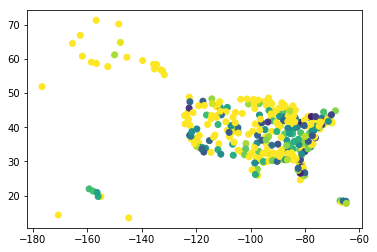

In [202]:
lats = []
longs = []
colors = []
for name in list(airports['airport_id']):
    if name not in competition_per_airport:
        continue
    lats.append(airports.loc[airports['airport_id'] == name].latitude.values[0])
    longs.append(airports.loc[airports['airport_id'] == name].longitude.values[0])
    colors.append(competition_per_airport[name])
plt.scatter(longs,lats,c=colors)

In [150]:
stock_prices.corr()

,AA,UA,B6,OO,AS,NK,WN,DL,HA
AA,1.000000,0.397999,0.626337,0.771373,-0.247823,-0.213474,0.772385,0.953588,-0.432380
UA,0.397999,1.000000,0.768571,-0.060218,0.623239,0.664136,0.505765,0.457156,0.487873
B6,0.626337,0.768571,1.000000,0.205292,0.319107,0.428252,0.643223,0.636877,0.230359
OO,0.771373,-0.060218,0.205292,1.000000,-0.659366,-0.482272,0.587605,0.768054,-0.702924
AS,-0.247823,0.623239,0.319107,-0.659366,1.000000,0.704576,0.004420,-0.182608,0.756895
NK,-0.213474,0.664136,0.428252,-0.482272,0.704576,1.000000,-0.103838,-0.136439,0.862343
WN,0.772385,0.505765,0.643223,0.587605,0.004420,-0.103838,1.000000,0.830354,-0.348522
DL,0.953588,0.457156,0.636877,0.768054,-0.182608,-0.136439,0.830354,1.000000,-0.389394
HA,-0.432380,0.487873,0.230359,-0.702924,0.756895,0.862343,-0.348522,-0.389394,1.000000
